In [25]:
import tensorflow as tf 
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt

In [26]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [27]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("Dataset", shuffle = "True", image_size = (IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [28]:
class_names = dataset.class_names 
class_names 

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [29]:
len(dataset)

68

In [30]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[194. 189. 193.]
  [190. 185. 189.]
  [186. 181. 185.]
  ...
  [183. 178. 185.]
  [184. 179. 186.]
  [185. 180. 187.]]

 [[192. 187. 191.]
  [191. 186. 190.]
  [190. 185. 189.]
  ...
  [183. 178. 185.]
  [184. 179. 186.]
  [185. 180. 187.]]

 [[188. 183. 187.]
  [188. 183. 187.]
  [190. 185. 189.]
  ...
  [186. 181. 188.]
  [188. 183. 190.]
  [189. 184. 191.]]

 ...

 [[166. 160. 164.]
  [170. 164. 168.]
  [165. 159. 163.]
  ...
  [173. 168. 175.]
  [154. 149. 156.]
  [141. 136. 143.]]

 [[154. 148. 152.]
  [151. 145. 149.]
  [148. 142. 146.]
  ...
  [154. 149. 156.]
  [148. 143. 150.]
  [143. 138. 145.]]

 [[150. 144. 148.]
  [137. 131. 135.]
  [136. 130. 134.]
  ...
  [165. 160. 167.]
  [155. 150. 157.]
  [131. 126. 133.]]], shape=(256, 256, 3), dtype=float32)


In [31]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


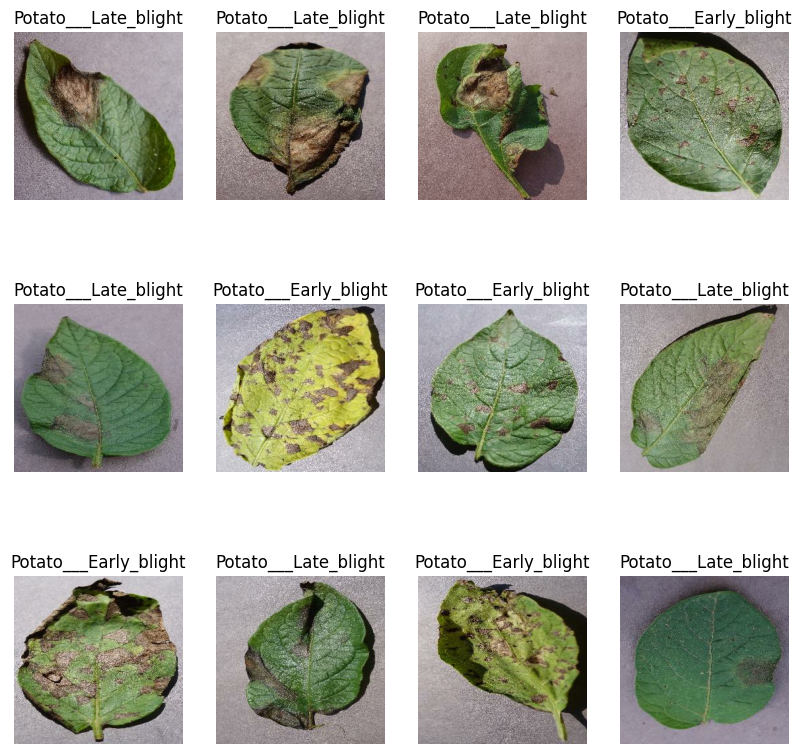

In [32]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12) :
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [33]:
len(dataset)

68

In [34]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [35]:
train_ds = dataset.take(54)
len(train_ds)

54

In [36]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [37]:
val_size =  0.1
len(dataset) * val_size

6.800000000000001

In [38]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [39]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [40]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True,shuffle_size=10000) :
    assert(train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle :
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [41]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [42]:
len(train_ds)

54

In [43]:
len(val_ds)

6

In [44]:
len(test_ds)

8

In [67]:
train_ds = train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(tf.data.AUTOTUNE)

In [69]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1/255)
])

In [70]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [75]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [76]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_19 (Sequential)           │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_85 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_86 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_87 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_87 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_88 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_89 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_90 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [78]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.4895 - loss: 0.9209 - val_accuracy: 0.6042 - val_loss: 0.7753
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.6337 - loss: 0.7281 - val_accuracy: 0.7188 - val_loss: 0.6646
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7679 - loss: 0.5318 - val_accuracy: 0.8177 - val_loss: 0.4185
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.8498 - loss: 0.3518 - val_accuracy: 0.8542 - val_loss: 0.3926
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.8724 - loss: 0.3009 - val_accuracy: 0.8906 - val_loss: 0.2254
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9214 - loss: 0.1977 - val_accuracy: 0.9167 - val_loss: 0.1916
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9491 - loss: 0.1365 - val_accuracy: 0.9167 - val_loss: 0.1757
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9575 - loss: 0.1173 - val_accuracy: 0.9219 - val_

In [80]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 592ms/step - accuracy: 0.9659 - loss: 0.1244


In [81]:
scores

[0.16679351031780243, 0.96484375]

In [82]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [84]:
history.history['loss']

[0.8737332820892334,
 0.6707973480224609,
 0.48602575063705444,
 0.3376639783382416,
 0.274326890707016,
 0.2116643339395523,
 0.14678043127059937,
 0.1377665251493454,
 0.14652161300182343,
 0.08891228586435318,
 0.06583957374095917,
 0.04816099628806114,
 0.08562643080949783,
 0.07152483612298965,
 0.03607768565416336,
 0.06341461092233658,
 0.02055828832089901,
 0.023265231400728226,
 0.01326418574899435,
 0.04404133930802345,
 0.014193964190781116,
 0.0033030735794454813,
 0.0008460195385850966,
 0.0004775065171997994,
 0.0001742696767905727,
 0.00013303723244462162,
 0.00010678102262318134,
 9.050945664057508e-05,
 7.706893666181713e-05,
 6.717428186675534e-05,
 5.878626325284131e-05,
 5.248044180916622e-05,
 4.6788252802798524e-05,
 4.1891711589414626e-05,
 3.8210135244298726e-05,
 3.476336496532895e-05,
 3.1492560083279386e-05,
 2.869900708901696e-05,
 2.623194995976519e-05,
 2.410187153145671e-05,
 2.2168316718307324e-05,
 2.0679102817666717e-05,
 1.9284676454844885e-05,
 1.785

In [85]:
len(history.history['loss'])

50

In [88]:
history.history['accuracy'][:5]

[0.5098379850387573,
 0.6724537014961243,
 0.7916666865348816,
 0.8622685074806213,
 0.8842592835426331]

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

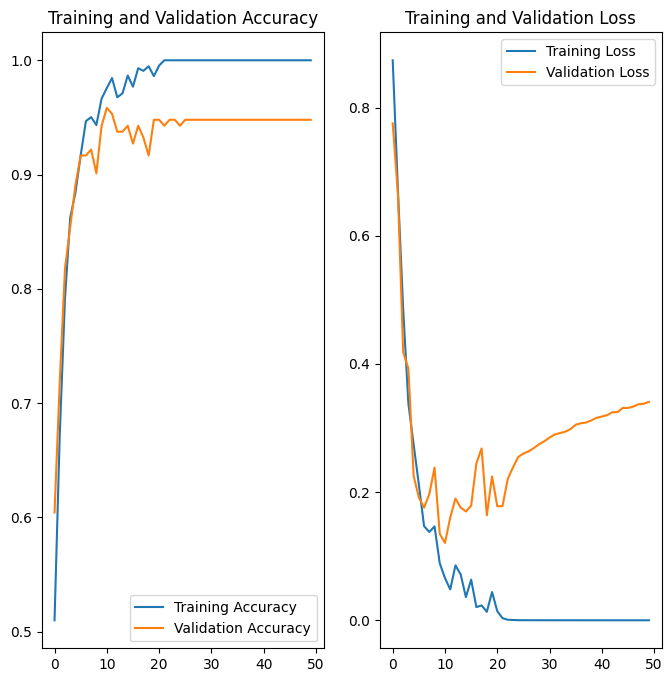

In [90]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
predicted label: Potato___Early_blight


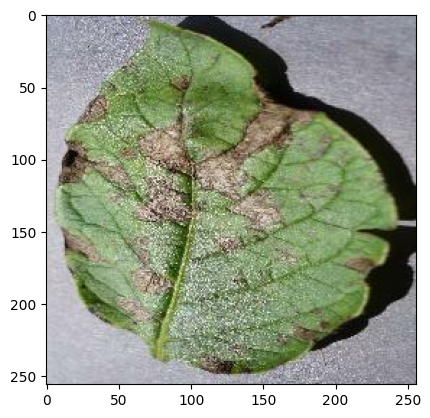

In [93]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [94]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


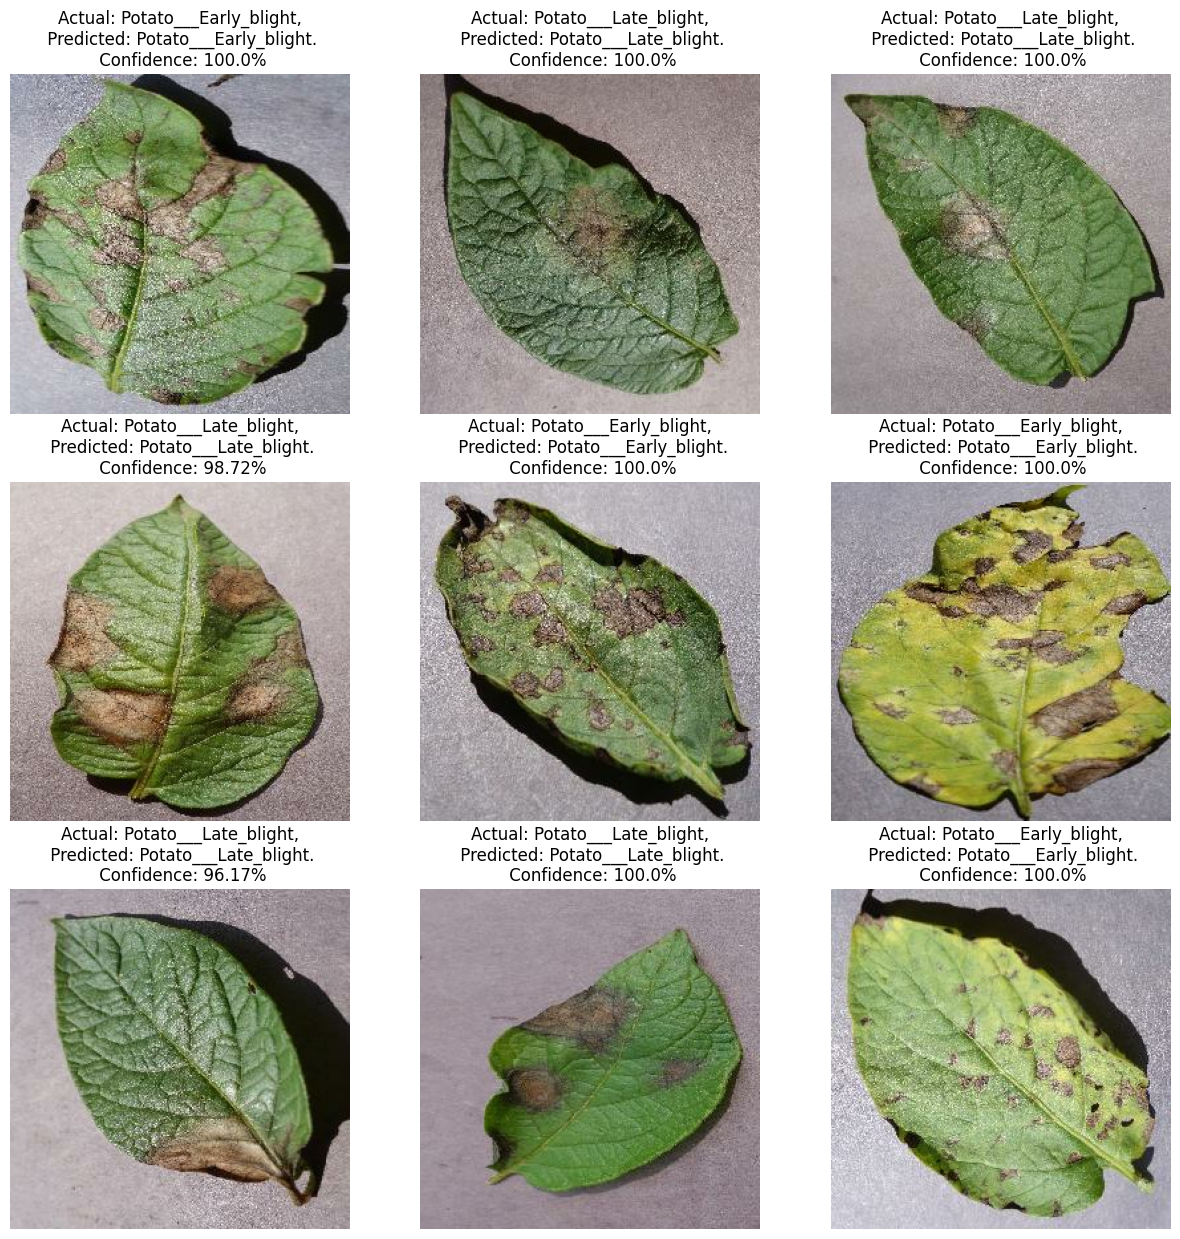

In [95]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [114]:
import os
from tensorflow import keras

models_dir = r"C:\Users\user\Desktop\Potato Disease Classification\models"
os.makedirs(models_dir, exist_ok=True)

existing_files = [
    int(f.split('.')[0]) for f in os.listdir(models_dir)
    if f.endswith(".h5") and f.split('.')[0].isdigit()
]
model_version = (max(existing_files) + 1) if existing_files else 1

save_path = os.path.join(models_dir, f"{model_version}.h5")
model.save(save_path)
print(f"Model saved successfully at: {save_path}")

print("Current files in models folder:", os.listdir(models_dir))

loaded_model = keras.models.load_model(save_path)
print("Model loaded successfully!")

Model saved successfully at: C:\Users\user\Desktop\Potato Disease Classification\models\2.h5
Current files in models folder: ['1.h5', '1.keras', '2.h5']


Model loaded successfully!
